In [1]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')

# Adaptive diffusion model
- The network is initially made of two groups of nodes with two distinct cultural/ideological states.
- Each edge is undirected and has a weight, $w \in [0, 1]$, which represents the strength of the connection. Weights are initially set to 0.5 for all the edges.
-  The diffusion of the node states occurs according to the following equation:
$$\frac{dc_i}{dt}=\alpha\sum_{j\in N_i}(c_j-c_i)w_{ij}$$
Here $\alpha$ is the diffusion constant  
$w_{ij}$ is the weight of the edge between node $i$ and node $j$.  

- In the meantime, each edge also changes its weight dynamically, according to the following equation:
$$\frac{dw_{ij}}{dt} = \beta w_{ij}(1-w_{ij})(1-\gamma|c_i-c_j|)$$
$\beta$ is the rate of adaptive edge weight change  
$\gamma$ is a parameter that determines how intolerant, or “picky,” each node is regarding cultural difference.

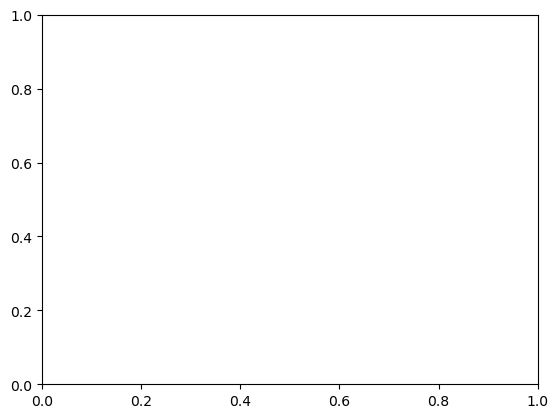

In [3]:
alpha = 1 # diffusion constant
beta = 3 # rate of adaptive edge weight change
gamma = 3 # pickiness of nodes
Dt = 0.01 # Delta t


# initialize a graph
g = nx.karate_club_graph()

for i, j in g.edges():
    g[i][j]['weight'] = 0.5
    
g.pos = nx.spring_layout(g)

for i in g.nodes():
    g.nodes[i]['state'] = 1 if g.nodes[i]['club']=='Mr. Hi' else 0
    
nextg = g.copy()

# Initial drawing
plt.cla()
fig, ax = plt.subplots(figsize=(8, 8))
plt.close()

# simulate
def animate(frame):
    global g, nextg
    ax.clear()
    
    for i in g.nodes():
        ci = g.nodes[i]['state']
        
        nextg.nodes[i]['state'] = ci + alpha * (sum((g.nodes[j]['state'] - ci) * g[i][j]['weight'] for j in g.neighbors(i))) * Dt
        
    for i, j in g.edges():
        w_ij = g[i][j]['weight']
        nextg[i][j]['weight'] = w_ij + beta * w_ij * (1-w_ij)*(1-gamma*abs(g.nodes[i]['state'] - g.nodes[j]['state']))*Dt
        
    nextg.pos = nx.spring_layout(nextg, pos=g.pos, iterations=5)
    
    
    plt.cla()
    nx.draw(g, cmap = plt.cm.binary, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes()],
            edge_cmap = plt.cm.binary, edge_vmin = 0, edge_vmax = 1,
            edge_color = [g[i][j]['weight'] for i, j in g.edges()],
            pos = g.pos,
            edgecolors='red',
            ax=ax)
    plt.close()
    
    g, nextg = nextg, g

In [4]:
anim = animation.FuncAnimation(fig, animate, frames=100, interval=100)

In [5]:
anim